In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score,accuracy_score,f1_score,roc_auc_score,roc_curve,precision_score
from sklearn.cluster import KMeans

In [252]:
data = pd.read_excel(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\Clustering\EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing

### To handle missing values

In [5]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### -->To observed the above output there is no null values

##  visualization the data for better understanding.

array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

<Figure size 500x600 with 0 Axes>

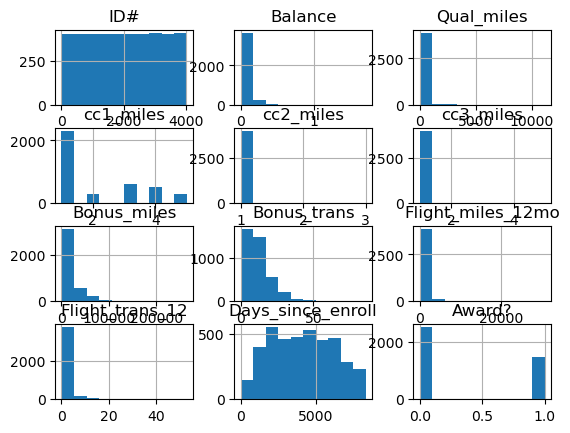

In [8]:
plt.figure(figsize=(5,6))
data.hist()

<Axes: >

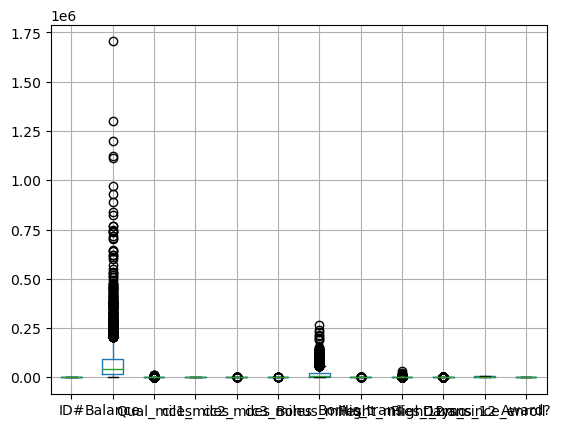

In [9]:
data.boxplot()

### Saperation of the numerical and categrical column

In [11]:
Num_col = [i for i in data.columns if data[i].dtype !='O']
Cat_col = [i for i in data.columns if data[i].dtype =='O']

In [12]:
print(Num_col)
print(Cat_col)

['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?']
[]


### To remove the outliers

In [14]:
Q1 =data[Num_col].quantile(0.25)
Q3 = data[Num_col].quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3,IQR)

ID#                   1010.5
Balance              18527.5
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           1250.0
Bonus_trans              3.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     2330.0
Award?                   0.0
Name: 0.25, dtype: float64 ID#                   3020.5
Balance              92404.0
Qual_miles               0.0
cc1_miles                3.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles          23800.5
Bonus_trans             17.0
Flight_miles_12mo      311.0
Flight_trans_12          1.0
Days_since_enroll     5790.5
Award?                   1.0
Name: 0.75, dtype: float64 ID#                   2010.0
Balance              73876.5
Qual_miles               0.0
cc1_miles                2.0
cc2_miles                0.0
cc3_miles                0.0
Bonus_miles          22550.5
Bonus_trans             14.0
Flight_miles_12mo 

In [15]:
Lower_Extreme = Q1-1.5*IQR
Upper_Extreme = Q3+1.5*IQR
print(Lower_Extreme,Upper_Extreme)

ID#                  -2004.50
Balance             -92287.25
Qual_miles               0.00
cc1_miles               -2.00
cc2_miles                1.00
cc3_miles                1.00
Bonus_miles         -32575.75
Bonus_trans            -18.00
Flight_miles_12mo     -466.50
Flight_trans_12         -1.50
Days_since_enroll    -2860.75
Award?                  -1.50
dtype: float64 ID#                    6035.50
Balance              203218.75
Qual_miles                0.00
cc1_miles                 6.00
cc2_miles                 1.00
cc3_miles                 1.00
Bonus_miles           57626.25
Bonus_trans              38.00
Flight_miles_12mo       777.50
Flight_trans_12           2.50
Days_since_enroll     10981.25
Award?                    2.50
dtype: float64


In [16]:
df = data[(data>=Lower_Extreme) & (data<=Upper_Extreme)]
df.isnull().sum()

ID#                    0
Balance              266
Qual_miles           226
cc1_miles              0
cc2_miles             43
cc3_miles             18
Bonus_miles          280
Bonus_trans           63
Flight_miles_12mo    569
Flight_trans_12      565
Days_since_enroll      0
Award?                 0
dtype: int64

In [17]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,NaN,NaN,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1
3995,4018,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1
3996,4019,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1
3997,4020,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0


In [18]:
df.fillna({'Balance':data['Balance'].mean(),'Qual_miles':0,'cc2_miles':data['cc2_miles'].mode()[0],'cc3_miles':data['cc3_miles'].mode()[0],'Bonus_miles':data['Bonus_miles'].mean(),'Bonus_trans':data['Bonus_trans'].mean(),'Flight_miles_12mo':0,'Flight_trans_12':0},inplace=True)

In [19]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,0.0,0.0,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1
3995,4018,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1
3996,4019,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1
3997,4020,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0


### Visuvalization after removing of the null values and outliers

<Axes: >

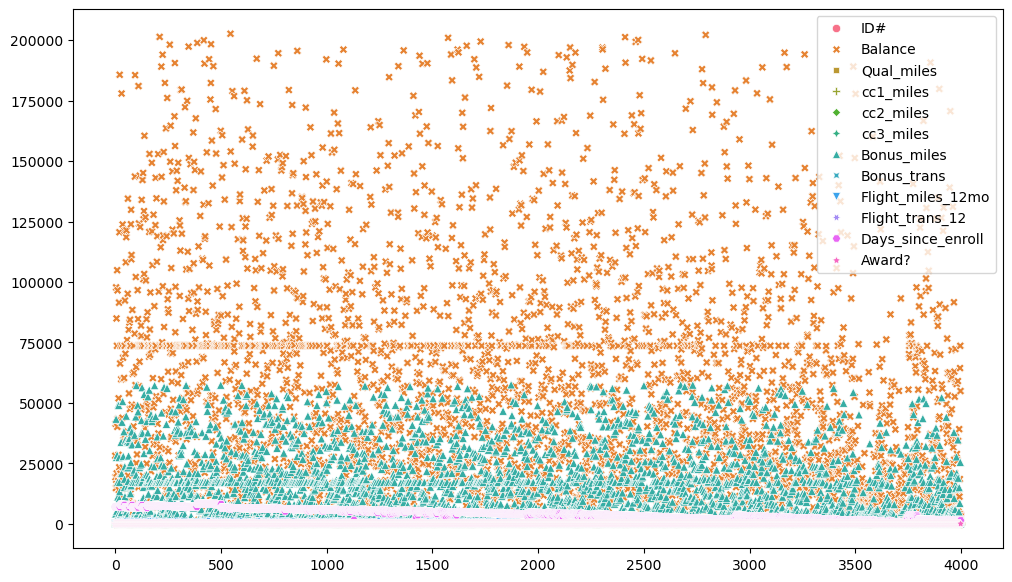

In [21]:
plt.figure(figsize=(12,7))
sns.scatterplot(df)

<Axes: >

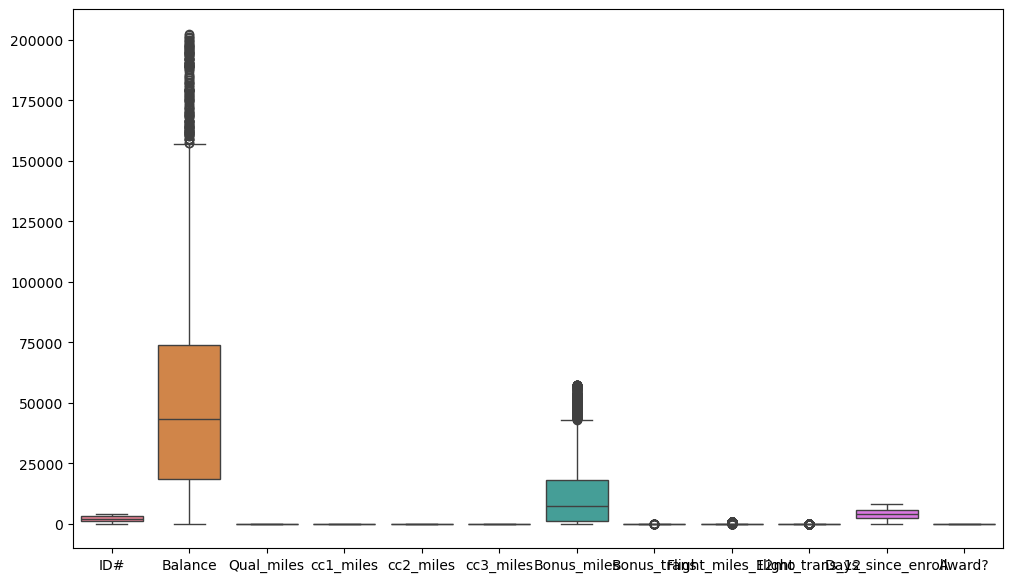

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(df)

<Figure size 1200x700 with 0 Axes>

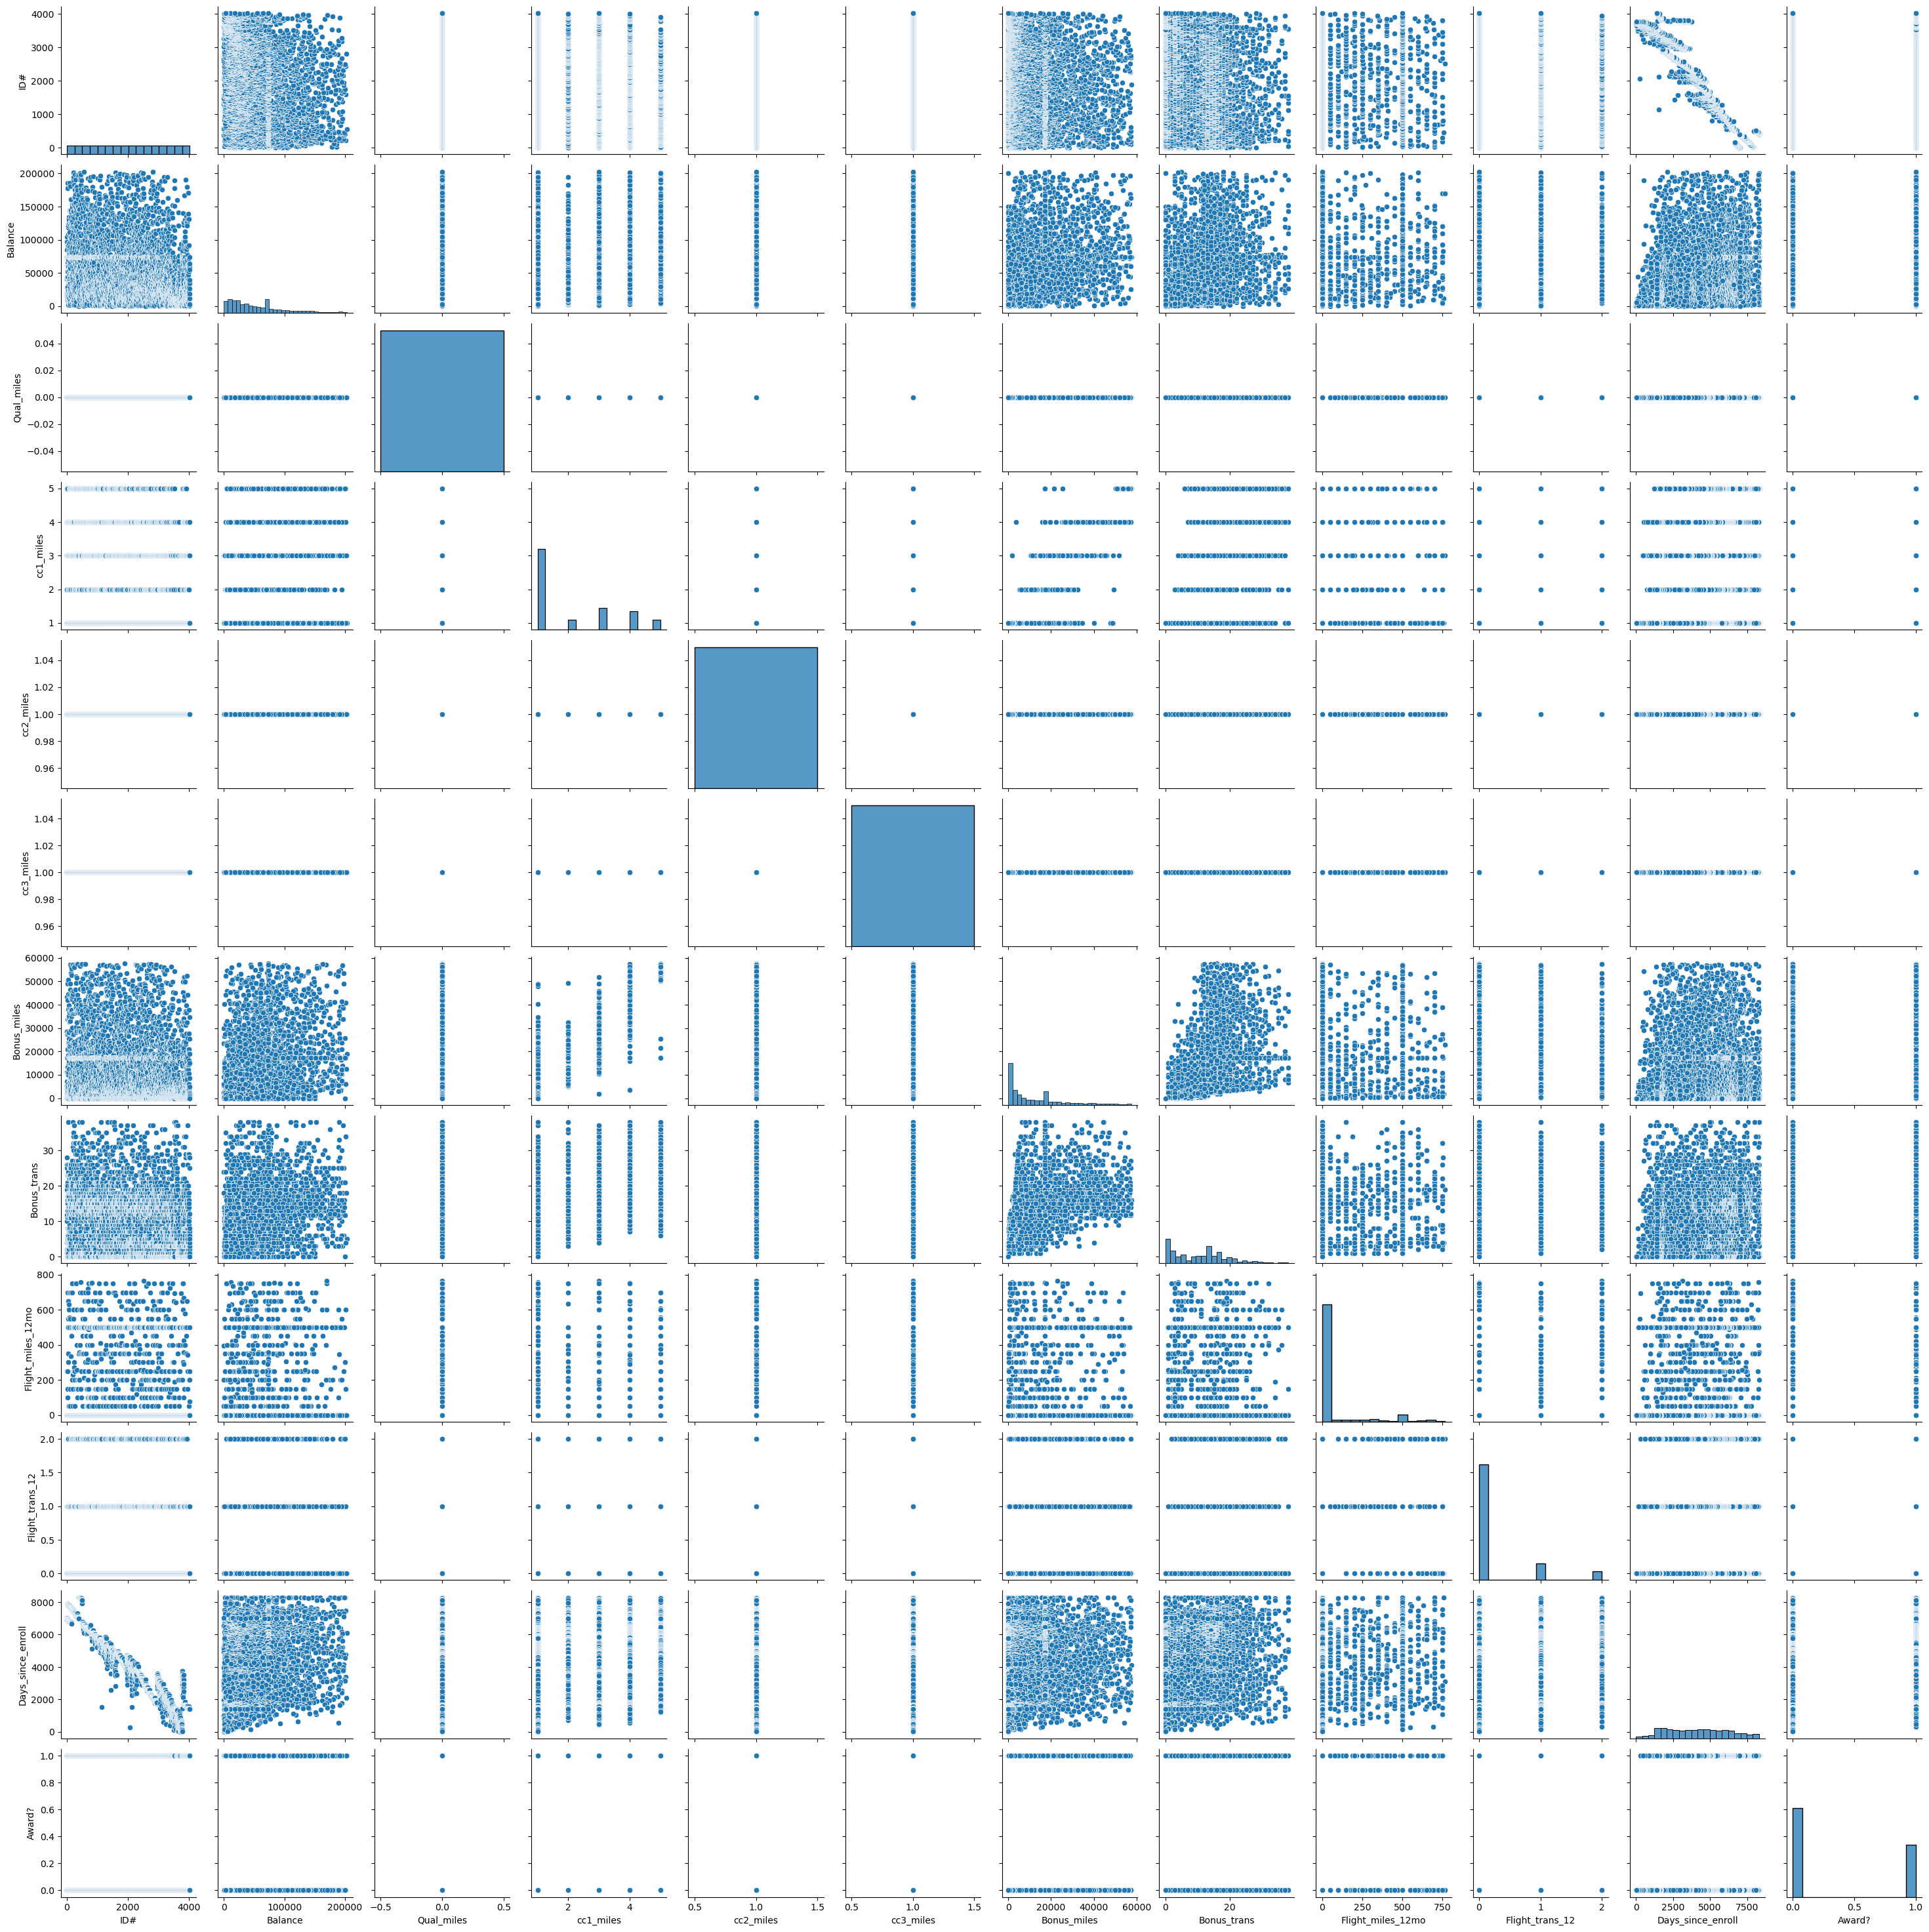

In [23]:
plt.figure(figsize=(12,7))
sns.pairplot(df)

# Implementing Clustering Algorithms

In [60]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

## K-means 

In [190]:
Km = KMeans(n_clusters=2)

In [192]:
cluster1 = Km.fit(df)

In [194]:
clusters1 = cluster1.labels_
labels = Km.fit_predict(df)

In [201]:
silhouette_score(df,cluster1.labels_)

0.5763346284210813

## Hierachial Clustering

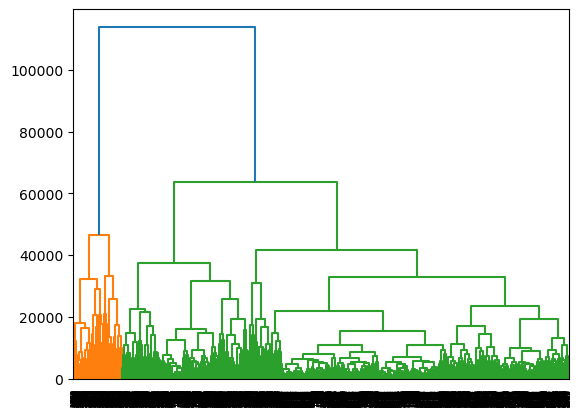

In [204]:
dendrogram = sch.dendrogram(sch.linkage(df, method='average')) 

In [205]:
agg = AgglomerativeClustering(n_clusters=2,linkage='average')

In [211]:
cluster2 = agg.fit(df)

In [213]:
cluster2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
silhouette_score(df,cluster2.labels_)

0.5873357473624281

## DBSCAN 

In [129]:
eps = [0,0.1,0.2,0.3,0.4,0.5]
min_node = range(0,11)

In [153]:
output=[]
for i in eps:
    for j in min_node:
        cluster = DBSCAN(eps=i, min_samples=j).fit(df)
        labels = cluster.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
        else:
            score = np.nan 
        output.append([i, j, score])

In [155]:
output

[[0.5, 5, nan],
 [0.5, 10, nan],
 [0.5, 15, nan],
 [1.0, 5, nan],
 [1.0, 10, nan],
 [1.0, 15, nan],
 [1.5, 5, nan],
 [1.5, 10, nan],
 [1.5, 15, nan]]

In [157]:
a = pd.DataFrame(output)

In [159]:
score = a.iloc[:,2].max()

In [161]:
a[a[2]==score]

,0,1,2


In [163]:
cluster = DBSCAN(eps=i, min_samples=j).fit(df)
labels = cluster.labels_

In [173]:
db = DBSCAN(eps=0.5,min_samples=1)

In [227]:
clusters3 = db.fit(df)
clusters3

DBSCAN(min_samples=1)

# Cluster Analysis and Interpretation

In [231]:
# Check if df is empty before calculating silhouette scores
if df.empty:
    print("DataFrame is empty. Cannot calculate silhouette scores.")
else:
    silhouette_kmeans = silhouette_score(df, cluster1.labels_)
    silhouette_hierarchical = silhouette_score(df,cluster2.labels_)

    print('Silhouette score for K-Means:', silhouette_kmeans)
    print('Silhouette score for Hierarchical:', silhouette_hierarchical)

Silhouette score for K-Means: 0.5763346284210813
Silhouette score for Hierarchical: 0.5873357473624281
